# Overview Classificazione
Sono un tipo di supervised learning, cioè che esiste una feature detta target che ha già dei valori labeled su cui basarsi.
Scikit-learn permette di dare accesso ad un gran numero di algoritmi di classificazione differenti, tra i più famosi:

- **K- Nearest Neighbors**
- **Support Vector Machines**
- **Decision Tree Classifiers**
 - **Random Forests**
- **Naive Bayes**
- **Linear Discriminant Analysis**

In [2]:
import numpy as np
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [3]:
def accuracy(pred, result):
    return 1-(abs(pred-result)).sum()/len(result)

In [4]:
cancer = load_breast_cancer()

In [5]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [8]:
X = cancer.data
y = cancer.target

In [9]:
df = pd.DataFrame(X,columns=cancer['feature_names'])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=.3)

# KNN:

In questo  algoritmo la classificazione avviene tramite  la maggioranza dei votanti dei **k** nearest neighbors di ogni punto:

Ha i seguenti parametri fondamentali:

1. `n_neighbors` numero dei vicini( di default = 5)
2. `weights:{'uniform','distance',callable or None}` funzione pesata usata durante la predizione:
    1. **uniform:** tutti i punti in ogni vicinato hanno gli stessi pesi
    2. **distance:** i vicini a meno distanza dal query  point avranno più importanza
    3. **[callable]:** user-defined function

In [20]:
model = KNeighborsClassifier()

In [21]:
model.fit(X_train,y_train)
result = model.predict(X_test)
accuracy(y_test,result)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9298245614035088

In [22]:
accuracy(y_train,model.predict(X_train))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9597989949748744

# SVC:

Support Vector Classification, si basa sul SVM:

lavora disegnano una linea tra i clusters differenti per poi raggrupparli in classi. Il classificatore cercherà di massimizzare la distanze tra la  linea che disegna.

Parametri fondamentali:

1. `C: float` parametri di regolazione.  La forza della regolazione é inversamente proporzionale a C( di default =10)
2. `kernel: {'linear','poly','rbf','sigmoid','precomputed'}` specifica il tipo di nucleo(kernel) da usare nell’algoritmo( il default = rbf)
3. `gamma:{'scale','auto'} or float` coefficiente  del nucleo per `rbf, poly e sigmoid` :
    1. **scale:** usa come gamma →  1/(n_features * `X.var()` ) ( default)
    2. **auto:** usa → 1/n_features
    3. Se float basta che non sia negativo

In [40]:
model = SVC()

In [41]:
model.fit(X_train,y_train)
result = model.predict(X_test)
accuracy(y_test,result)

0.9181286549707602

In [42]:
accuracy(y_train,model.predict(X_train))

0.9195979899497487

# Decision Tree **Classifiers:**

Divide un dataset in subsets sempre più piccoli basati su diversi criteri.

Parametri fondamentali:

1. `criterion:{"gini","entropy","log_loss"}` la funzione che misura la qualità di una divisione ( la matematica  dietro questa non é di pertinenza di questo corso) (default  = gini)
2. `splitter:{"best","random"}` la strategia per scegliere chi dividere per ogni nodo(default é best):
    1. **best:** sceglie la migliore
    2. **random:** sceglie la migliore randomica
3. `max_depth: int` la profondità massima dell’albero
4. `random_state: int` controlla  la casualità nell’estimatore. Per poter ottenere un caratteristica deterministica durante la fase di fitting si impone`random_state` fissato ad un intero( di default  é None)

In [12]:
model = DecisionTreeClassifier(criterion="entropy")

In [13]:
model.fit(X_train,y_train)
result = model.predict(X_test)
accuracy(y_test,result)

0.9064327485380117

In [14]:
accuracy(y_train,model.predict(X_train))

1.0

In [15]:
model.feature_names_in_

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype=object)

<AxesSubplot:>

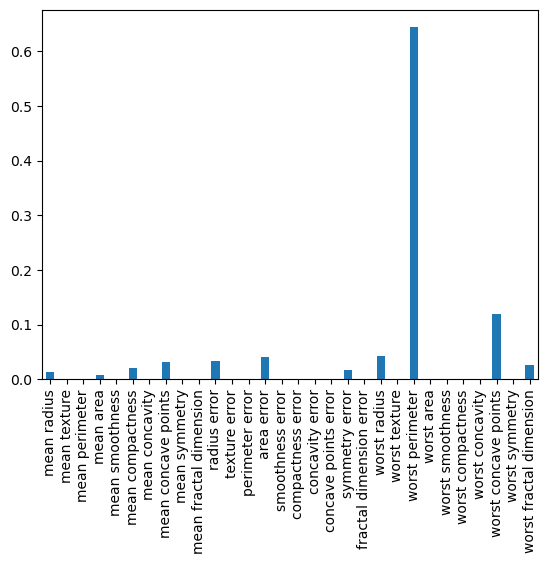

In [16]:
import matplotlib.pyplot as plt
importanza = model.feature_importances_
std = np.std([model.feature_importances_],axis=0)
DF_importanza = pd.Series(importanza,index=model.feature_names_in_)
fig,ax = plt.subplots()
DF_importanza.plot.bar(yerr=std,ax=ax)

# Random Forests:

É  un meta estimatore che adatta un numero di decision tree classifiers in vari sub-campioni del dataset e  usa la media per migliorare l’accuratezza e l’overfitting.

Parametri fondamentali:

1. `n_estimators: int` numero di alberi nella foresta( default = 100)
2. `criterion:{"gini","entropy","log_loss"}` la funzione che misura la qualità di una divisione ( la matematica  dietro questa non é di pertinenza di questo corso) (default  = gini)
3. `max_depth: int` la profondità massima dell’albero
4. `bootstrap: bool` Specifica se i campioni “bootstrap”vengono utilizzati quando si realizzano gli alberi.
    1. Se falso → tutto il dataset é utilizzato per costruire ogni albero
5. `max_samples: int or float` se `bootstrap` é vero ,  fissa il numero di campioni da disegnare dal dataset di allenamento X pre ogni estimatore base ( di default = None)

In [70]:
model = RandomForestClassifier()

In [71]:
model.fit(X_train,y_train)
result = model.predict(X_test)
accuracy(y_test,result)

0.9473684210526316

In [72]:
accuracy(y_train,model.predict(X_train))

1.0

# **Naive Bayes:**

Determina la probabilità che un esempio appartenga ad una determinata classe, calcolando la probabilità che l’evento accadrà dati certi eventi di input accaduti.

La classe principale é  `Gaussian Naive Bayes(GaussianNB)`

In [73]:
model = GaussianNB()

In [74]:
model.fit(X_train,y_train)
result = model.predict(X_test)
accuracy(y_test,result)

0.9181286549707602

In [75]:
accuracy(y_train,model.predict(X_train))

0.9422110552763819

# **Linear Discriminant Analysis**

Riduce la dimensionalità del dataset, proiettando tutti i data points su una linea. Poi combina questi punti in classi basate sulla loro distanza da un punto deciso oppure un centroide.


Parametri fondamentali:

1. `solver:{'svd','Isqr','eigen'}` il solver che viene utilizzato:
    1. **svd →** ****************************Singular value decomposition**************************** (default) , raccomandato per dataset con un gran numero di features
    2. ********Isqr →******** Least squares solution
    3. ****************eigen →**************** Eigenvalue decomposition

Le due classi più importanti sono: LinearDiscriminantAnalysis() e  QuadraticDiscriminantAnalysis()

In [76]:
model = QuadraticDiscriminantAnalysis()

In [77]:
model.fit(X_train,y_train)
result = model.predict(X_test)
accuracy(y_test,result)

0.9239766081871346

In [78]:
accuracy(y_train,model.predict(X_train))

0.9874371859296482